In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from get_data import get_data

In [3]:
datafilename = '/home/scratch/mabitbol/Daisy.raw.vegas/Daisy.raw.vegas.B.fits'

In [ ]:
x = get_data(datafilename, nchan=None, chanStart=10000, chanStop=11000, average=None, scanlist=[46], mintsys=None,
            maxtsys=None)

In [8]:
x.keys()

['feed',
 'equinox',
 'observer',
 'chanStop',
 'siteelev',
 'bandwidth',
 'xsky',
 'ysky',
 'frontend',
 'freq',
 'chanStart',
 'specsys',
 'date-obs',
 'jdobs',
 'restfreq',
 'scans',
 'doppler',
 'xctype',
 'projid',
 'calibtype',
 'units',
 'wt',
 'radesys',
 'data',
 'stokes',
 'nchan',
 'telescop',
 'ntsysflag',
 'source',
 'yctype',
 'veldef',
 'sitelong',
 'sitelat']

In [9]:
xsky = x['xsky'][::8]
ysky = x['ysky'][::8]

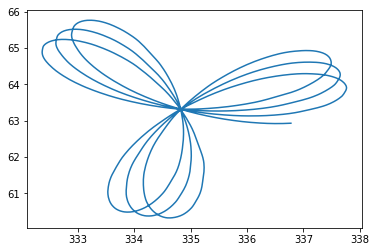

In [10]:
plot(xsky, ysky)

In [12]:
data = x['data']

In [13]:
print data.shape

(57224, 1001)


In [14]:
data = data.reshape((-1, 8, 1001))

In [15]:
data.shape

(7153, 8, 1001)

In [16]:
ondata = data[:,1::2,:]

In [17]:
offdata = data[:,0::2,:]

In [18]:
ondata.shape

(7153, 4, 1001)

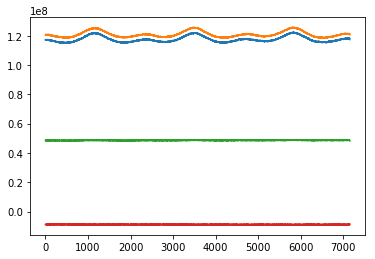

In [19]:
plot(ondata.mean(2))

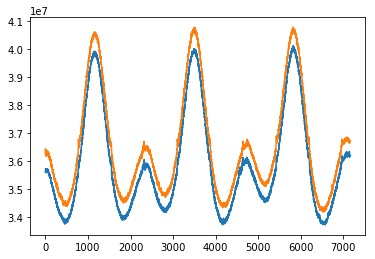

In [22]:
plot(offdata.mean(2)[:,:2])

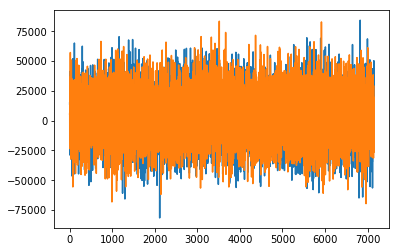

In [23]:
plot(offdata.mean(2)[:,2:])

In [24]:
np.mean(offdata.mean(2)[:,2])

3678.2593

In [25]:
np.mean(offdata.mean(2)[:,3])

3827.1499

In [28]:
np.std(offdata.mean(2)[:,2])

20078.92

In [29]:
np.std(offdata.mean(2)[:,3])

19979.135

In [30]:
offdata.shape

(7153, 4, 1001)

In [35]:
calibrated_dataX = offdata[:,0,:] / (ondata[:,0,:] - offdata[:,0,:])

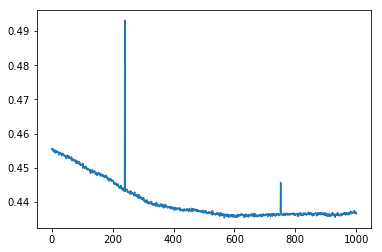

In [38]:
plot(calibrated_dataX.mean(0))

In [39]:
testdata = calibrated_dataX.mean(0)[600:800]

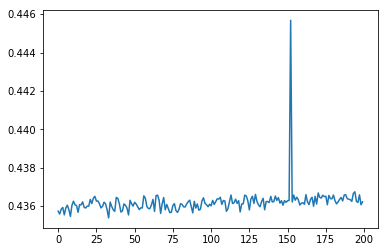

In [40]:
plot(testdata)

In [41]:
rfichannel = np.where(testdata>0.440)[0]

In [43]:
rfichannel += 600

In [44]:
index = np.arange(600, 800)

In [46]:
mask = index!= rfichannel

In [47]:
index = index[mask]

In [48]:
calibrated_dataX.shape

(7153, 1001)

In [49]:
testtod = calibrated_dataX[:,index]

In [50]:
testtod.shape

(7153, 199)

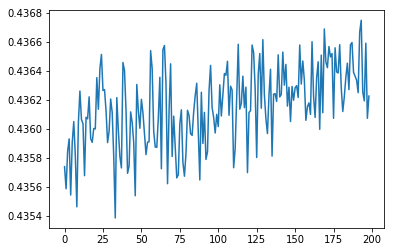

In [51]:
plot(testtod.mean(0))

In [52]:
powertod = testtod.mean(1)

In [53]:
len(powertod)

7153

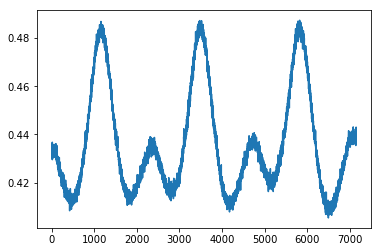

In [54]:
plot(powertod)

In [57]:
ppf = np.fft.fft(powertod)
freqs = np.fft.fftfreq(len(powertod), d=0.04)

In [62]:
len(powertod)

7153

In [71]:
pxx, fr = mlab.psd(offdata[:,0,:].mean(1), NFFT=2**12, Fs=25.)
pxx2, fr = mlab.psd(offdata[:,1,:].mean(1), NFFT=2**12, Fs=25.)

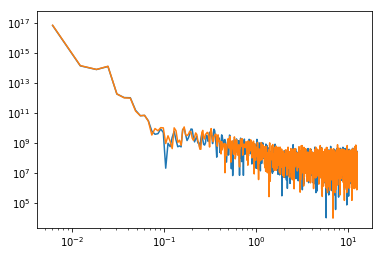

In [75]:
loglog(fr, pxx)
loglog(fr, pxx2)

In [76]:
pxx, fr = mlab.psd(offdata[:,2,:].mean(1), NFFT=2**12, Fs=25.)
pxx2, fr = mlab.psd(offdata[:,3,:].mean(1), NFFT=2**12, Fs=25.)

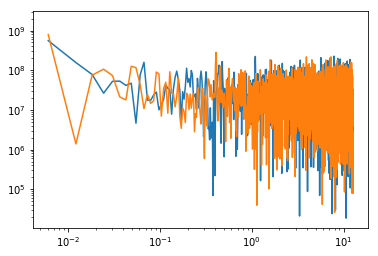

In [77]:
loglog(fr, pxx)
loglog(fr, pxx2)

In [68]:
pxx, fr = mlab.psd(ondata[:,0,:].mean(1), NFFT=2**12, Fs=25.)

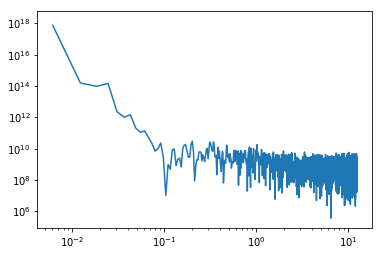

In [69]:
loglog(fr, pxx)